<a href="https://colab.research.google.com/github/LeandroCoelhos/credit_score/blob/main/Credit%20Score%20de%20Clientes%20de%20telecomunica%C3%A7%C3%B5es.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Credit Score de Clientes de Telecomunicações

 Muito se ouve falar sobre modelos preditivos, sobre como a Inteligencia artificial, o aprendizado de maquína (famoso Machine Learning) ajudam as empresas nas tomadas de decisões. Mas será que todo esse esforço é nescessário para resolver todos os problemas?
 Em muitos casos uma boa análise dos dados é suficiente para direcionar muitas decisões de grande impacto nas empresas, sem gastar os preciosos e caros recursos computacionais processando grandes bases de dados. 

 Aqui temos exatamente essa proposta, ver o quanto de informações relevantes conseguimos extrair dos dados sem a nescessidade de implementar modelos de Machine Learning.

 Vamos partir da situação que recebemos um conjunto de dados de uma empresa de telecomunicações (da qual nada sabemos), e vamos tentar aumentar gerar informações que aumente seus lucros e melhore sua base de clientes rentáveis. E ao longo do processo, vamos tentar responder algumas perguntas **SEM** o uso de **Machine Learning**:

 1. Quais é o perfil de cliente menos/mais rentável?
 2. Quais planos/serviços oferecemos que dão maior retonro?
 3. Quais clientes são os mais/menos rentáveis e importantes para empresa?
 4. Como podemos auxiliar os setores de vendas/market com esses dados?
 5. Somente com a análise dos dados, é possivel a tomada de decisões que tenham impacto na empresa?


As respostas destas perguntas serão respondidas ao longo deste projeto. As conclusões alcançadas se encontram ao final, junto com algumas conclusões sobre o conjunto de dados.

---

**O que será abordado neste projeto?**

Vamos fazer uma análise exploratória de um conjunto de dados de uma empresa de telecomunicações a fim de encontrar formas de melhorar o rendimento da empresa sem a nescessidade de implementar Machine Learning, através de insights. Será feita uma breve discussão sobre como os dados analisados podem auxiliar as outras áreas da empresa, algumas particularidades do modelo de negócio da empresa e com o axílio de gráficos, vamos tornar visual algumas informações.

----
A proposta inical deste projeto foi participar da 4ª Competição de Machine Learning da Flai. Deixo aqui um link para a segunda parte deste projeto, que contém o modelo de Machine Learning enviado para competição que alcançou o 5º Lugar. Ele tem a vantagem de traçar com mais precisão o perfil do cliente, em contrapartida o tempo de treinamento e desenvolvimento do modelo são pontos que devem ser levados em consideração para a empresa (suponto um caso real).

#Descrição do Conjunto de dados

- Gender(Sexo): Se o cliente é homem ou mulher;
- Senior Citizen(Idoso): Se o cliente é um cidadão idoso ou não (1, 0);
- Partner(Parceiro): Se o cliente tem um parceiro ou não (Sim, Não);
- Dependents(Dependentes): Se o cliente tem dependentes ou não (Sim, Não);
- Tenure(Empresa): Número de meses que o cliente permaneceu na empresa;
- Phone Service(Telefone): Se o cliente tem um serviço de telefone ou não (Sim, Não);
- Multiple Lines(VariasLinhas): Se o cliente tem várias linhas ou não (Sim, Não, Sem serviço telefônico);
- Internet Service(Internet): Provedor de serviços de Internet do cliente (DSL, fibra óptica, não);
- Online Security(SegurancaOnline): Se o cliente tem segurança online ou não (Sim, Não, Sem serviço de Internet);
- Online Backup(BackupOnline): Se o cliente tem backup online ou não (Sim, Não, Sem serviço de Internet);
- Device Oritection(ProtecaoDispositivo): Se o cliente tem proteção de dispositivo ou não (Sim, Não, Sem serviço de Internet);
- Tech Support(SuporteTecnico): Se o cliente tem suporte técnico ou não (Sim, Não, Sem serviço de Internet);
- Streaming TV(TV): Se o cliente tem streaming de TV ou não (Sim, Não, Sem serviço de Internet);
- Streaming Movies(Filmes): Se o cliente tem streaming de filmes ou não (Sim, Não, Sem serviço de Internet);
- Contract(Contrato): A vigência do contrato do cliente (mês a mês, um ano, dois anos);
- Peperless Billing(FaturaPapel): Se o cliente tem faturamento sem papel ou não (Sim, Não);
- Payment Method(Pagamento): O método de pagamento do cliente (cheque eletrônico, cheque enviado, transferência bancária (automático), cartão de crédito (automático));
- Cliente: Se é um cliente normal ou Premium.

---
Temos um total de 2500 linhas com 18 colunas com informações dos clientes.

#Importação dos dados

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as plt

Foi usada a biblioteca pandas para fazer a importação dos dados.
O conjunto de dados foi disponibilizado para os participantes por um link do google drive. Para facilitar a importação dos dados disponibilizei eles em meu repositório no GitHub. Lá é possivel encontrar mais informações sobre o conjunto de dados e sua origem.

In [ ]:
url = 'https://raw.githubusercontent.com/LeandroCoelhos/credit_score/main/data/treino.csv'

data = pd.read_csv(url)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   gender            2500 non-null   object
 1   SeniorCitizen     2500 non-null   int64 
 2   Partner           2500 non-null   object
 3   Dependents        2500 non-null   object
 4   tenure            2500 non-null   int64 
 5   PhoneService      2500 non-null   object
 6   MultipleLines     2500 non-null   object
 7   InternetService   2500 non-null   object
 8   OnlineSecurity    2500 non-null   object
 9   OnlineBackup      2500 non-null   object
 10  DeviceProtection  2500 non-null   object
 11  TechSupport       2500 non-null   object
 12  StreamingTV       2500 non-null   object
 13  StreamingMovies   2500 non-null   object
 14  Contract          2500 non-null   object
 15  PaperlessBilling  2500 non-null   object
 16  PaymentMethod     2500 non-null   object
 17  Cliente       

O comando "info" mostra o total de observações em cada coluna, bem como o tipo de dado daquela coluna, se é numérico ou texto. 

Podemos ver que há variáveis numéricas (int64) e de texto (object). Muitos algoritmos não suportam strings, por isso precisaremos transformar essas colunas futuramente.

Outra coisa que podemos observar é que não há valores nulos nos dados e os tamanhos correspondem ao que nos foi informado.

#Deixando o conjunto de dados mais intuitivo

Vamos renomear as colunas para deixar a análise mais intuitiva, sem precisar ler a documentação sempre que quisermos detalhes de uma coluna.

In [ ]:
def Renomeia(data):
  data.rename(columns = {'gender': 'Sexo',
                       'SeniorCitizen': 'Idoso',
                       'Partner': 'Parceiro',
                       'Dependents': 'Dependentes',
                       'tenure': 'Empresa',
                       'PhoneService':'Telefone',
                       'MultipleLines': 'VariasLinhas',
                       'InternetService': 'Provedor',
                       'OnlineSecurity': 'SegurancaOnline',
                       'OnlineBackup': 'BackupOnline',
                       'DeviceProtection': 'ProtecaoDispositivo',
                       'TechSupport': 'SuporteTecnico',
                       'StreamingTV': 'TV',
                       'StreamingMovies': 'Filmes',
                       'Contract': 'Contrato',
                       'PaperlessBilling': 'FaturaPapel',
                       'PaymentMethod': 'Pagamento'},inplace = True)
  return data

In [ ]:
Renomeia(data).head(1)

,Sexo,Idoso,Parceiro,Dependentes,Empresa,Telefone,VariasLinhas,Provedor,SegurancaOnline,BackupOnline,ProtecaoDispositivo,SuporteTecnico,TV,Filmes,Contrato,FaturaPapel,Pagamento,Cliente
0,Female,0,No,No,20,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,Normal


###2.3.1 Colunas Categóricas

Vamos fazer uma contagem das observações e categorias de cada coluna, para termos uma noção de como nosso conjunto de dados esta distribuido.

In [ ]:
col_data = data.columns
#col_num_tr = data.columns[treino.dtypes == "int64"] #Colunas de variáveis numericas
#col_obj_tr = treino.columns[treino.dtypes == "object"] #Colunas do tipo numéricas

In [ ]:
for i in col_data:
  print("Coluna: ",i)
  print(data[i].value_counts(), "\n")

Coluna:  Sexo
Male      1285
Female    1215
Name: Sexo, dtype: int64 

Coluna:  Idoso
0    2112
1     388
Name: Idoso, dtype: int64 

Coluna:  Parceiro
No     1278
Yes    1222
Name: Parceiro, dtype: int64 

Coluna:  Dependentes
No     1754
Yes     746
Name: Dependentes, dtype: int64 

Coluna:  Empresa
1     223
72    121
2      97
3      74
4      67
     ... 
62     18
28     17
38     17
40     17
63     16
Name: Empresa, Length: 72, dtype: int64 

Coluna:  Telefone
Yes    2261
No      239
Name: Telefone, dtype: int64 

Coluna:  VariasLinhas
No                  1236
Yes                 1025
No phone service     239
Name: VariasLinhas, dtype: int64 

Coluna:  Provedor
Fiber optic    1079
DSL             880
No              541
Name: Provedor, dtype: int64 

Coluna:  SegurancaOnline
No                     1253
Yes                     706
No internet service     541
Name: SegurancaOnline, dtype: int64 

Coluna:  BackupOnline
No                     1114
Yes                     845
No int

Aqui vemos que as colunas Sexo e Parceiro estão balanceadas para as duas categorias. 

Podemos ver também que há muito mais clientes sem dependetes e muitos clientes que não são idosos.

A maioria dos nossos clientes possui linha telefonica e a maioria também tem serviço de internet, seja por fibra Óptica ou DSL.

Outro fator que vai nos axuliar em nossa análise é que a maioria do conjunto de dados possui variáveis categóricas de duas ou três categorias, o que nos ajuda na vizualização dos dados.

#Análise Gráfica

Vamos vizualizar para cada categoria as tendencias de um cliente ser premium ou não, e fazer algumas comparações e tentar reconhecer alguns padrões de consumo.

O grande coração e a maior parte das informações que podemos obter de um conjunto de dados está ligada a análise gráfica dos dados, no reconhecimento de padrões e na associação de informações pertinentes ao nosso problema através de uma boa exibição.

Para essa vizualização utilizaremos as bibliotedas Seaborn e Matplot, que nos permitem personalizar os gráficos.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

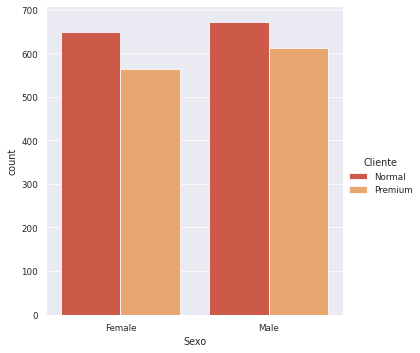

In [ ]:
#f, ax = plt.subplots(figsize=(20, 36))
sns.set_style('darkgrid')
sns.set_palette('RdYlBu')
sns.set_context('paper')
g = sns.catplot(data = data, x='Sexo', hue="Cliente", kind='count')
plt.show()

A coluna Sexo não nos traz muita informação nova, ambos os sexos aparecem com quase a mesma frequência no nosso conjuto de dados e parece não haver influência sobre o sexo e a categoria do cliente.

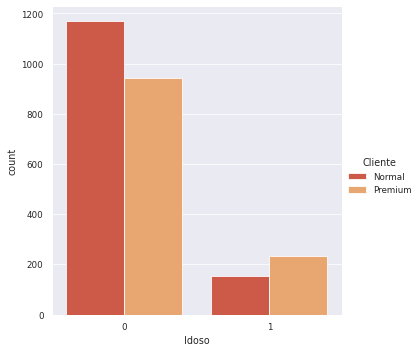

In [ ]:
sns.catplot(data = data, x='Idoso', hue="Cliente", kind='count')
plt.show()

O fato de nosso cliente ser idoso traz uma tendência dele ser um cliente prêmium e para clientes mais jovens a tendência de se enquadrar como um cliente normal.

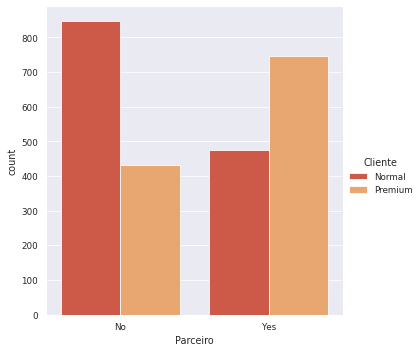

In [ ]:
sns.catplot(data = data, x='Parceiro', hue="Cliente", kind='count')
plt.show()

Caso nosso cliente não tenha parceiro, o gráfico mostra uma chance de 2/3 dele ser um cliente regular, contra 1/3 de ser premium.

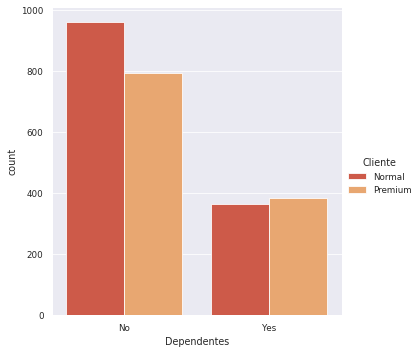

In [ ]:
sns.catplot(data = data, x='Dependentes', hue="Cliente", kind='count')
plt.show()

No caso de nosso cliente possuir ou não dependentes, possui uma relação direta muito fraca com sua classificação.

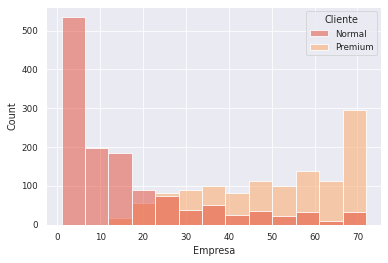

Clientes com Menos de 14 meses:  810
Clientes com Mais  de 60 meses:  477
Total de clientes classificados pelo tempo de empresa:  51.48 %


In [ ]:
sns.histplot(data = data, x='Empresa', hue="Cliente")
plt.show()
mais_60 = (data.Empresa>60).value_counts()[1]
menos_14 = (data.Empresa<14).value_counts()[1]
p_classificados = (mais_60 + menos_14)*100/2500
print('Clientes com Menos de 14 meses: ', menos_14)
print('Clientes com Mais  de 60 meses: ', mais_60)
print('Total de clientes classificados pelo tempo de empresa: ', p_classificados, '%' )

Aqui temos o ponto chave da nossa análise. Sabendo o tempo de empresa de nossos clientes, podemos definir preliminarmente se ele é premium ou não. Para clientes com menos de 13 meses de empresa, nenhum deles se enquada na categoria premiu.
Já os clientes com mais de 40 meses de empresa, as chances dele ser considerado um cliente premium são muito altas. Quando vemos para clientes com mais de 60 meses, vemos que a grande maioria é premium.

Com essa premissa já podemos categorizar mais de 50% da nossa base de cliente com o seguinte critério:
1. Nenhum cliente se enquadra na categoria premium com menos de 13 meses de empresa;
2. Clientes com mais de 60 meses de empresa podem ser considerados premium.

Sem nenhum uso de Machine Learning, já somos capazes de determinar mais da metade da nossa base de dados de clientes.

 >Os métodos de definição e critérios para um cliente ser premium ou não, estão muito ligados as regras de negócio da empresa, muitas delas usam a quantia gasta pelo cliente na empresa para defirnir isso. Neste caso, se um cliente pode não tere atingido esta meta antes dos 13 meses que ele contratou aquela empresa.

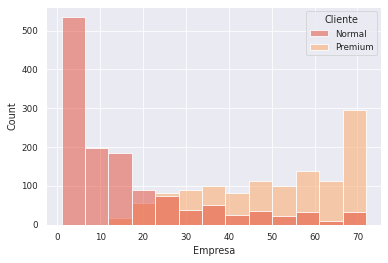

In [ ]:
sns.histplot(data = data, x='Empresa', hue="Cliente")
plt.show()

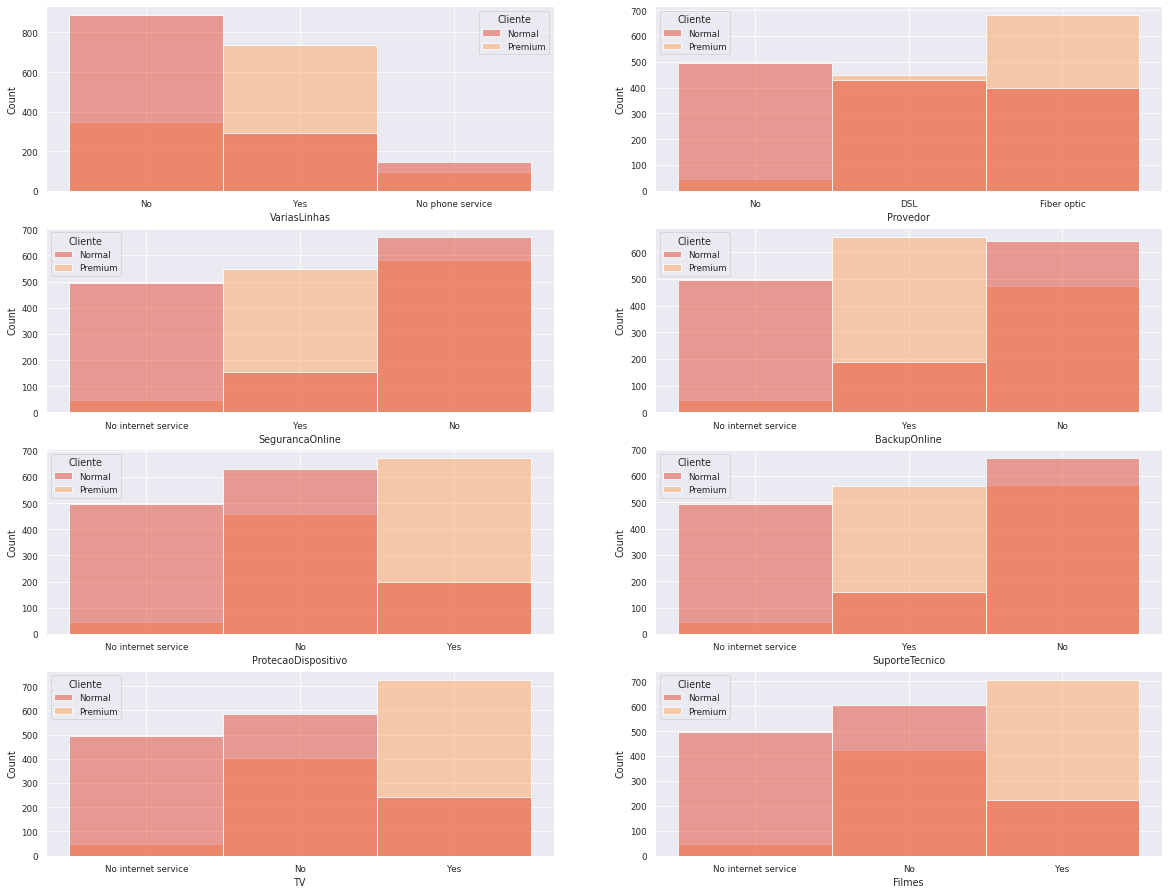

In [ ]:
f, ax = plt.subplots(figsize=(20, 36))
for i in range(7,14 + 1):
  plt.subplot(9,2,i)
  sns.histplot(data = data, x=col_data[i-1], hue="Cliente")
plt.show()

Aqui temos alguns serviços adicionais que podem ser contratados pelos nossos clientes, vamos chamar eles de "Pacotes adicionais". São eles: Várias linhas, Segurança Online, Backupe Online, Proteção de Dispositivos e Suporte Técnico, serviço de Streaming de Filmes e de Tv a cabo. E aqui vem algumas informações relevantes:
- Vemos uma redundancia nos dados coletados, onde aqueles clientes que não possuem serviço de internet, naturalmente não possuem nenhum dos Pacotes adicionais que dependam de conexão com internet desta empresa. Logo esta informação pode ser relevante em alguma análise, mas em questão de informação nova, ela ja está impressa na coluna "Provedor" que diz se o cliente possui serviço de internet.
- Para todos os clientes que possuem ou não esses pacotes, é observada uma mesma tendência. Possuir um destes pacotes indicam maiores chances dele ser um premium, enquanto não contratar esses serviçõs indicam mais fortemente que é um cliente classificado como comum. 

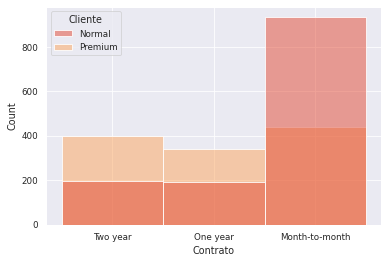

In [ ]:
sns.histplot(data = data, x='Contrato', hue="Cliente")
plt.show()

Aqui vemos que clientes que possuem contratos anuais possuem cerca de 2/3 de chance de serem clientes premium, enquanto para clientes com contratos 'mes a mes' tem somente 1/3 de chance de serem clientes premium.

  Isso confirma as informações levantadas anteriormente, onde clientes com mais tempo de empresa possuem chances muito maiores de serem premium.

In [ ]:
, , 'Telefone',
       'VariasLinhas', 'Provedor', 'SegurancaOnline', 'BackupOnline',
       'ProtecaoDispositivo', 'SuporteTecnico', 'TV', 'Filmes', 'Contrato',
       'FaturaPapel', 'Pagamento', 'Cliente'

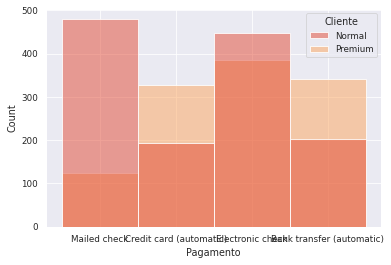

In [ ]:
sns.histplot(data = data, x='Pagamento', hue="Cliente")
plt.show()

Outra informação que podemos deduzir dos dados é que para aqueles clientes cujas faturas são pagas automaticamente tem maiores tendencias a serem clientes premium para empresa, enquanto aqueles que recebem a fatura por correspondência tem uma tendência muito menor de serem clientes premium.

###Agrupamento de Informações
Como vimos, quanto mais Pacotes adicionais nossos clientes contratam, maiores as chances deles serem considerados premium. Tendo isso em mente, vamos criar uma nova coluna para agrupar essa informação. Para cada pacote contratado pelos nossos clientes, vamos somar um ponto a nova coluna "Pacotes Adicionais". 

Para isso vamos utilizar uma função que tranforma as colunas categóricas de interesse em colunas numéricas, e ir adicionando a nova coluna criada uma pontuação baseada nas outras

In [ ]:
def Mapeia(data): 
  dt = data.copy()
  dt['VariasLinhas'] = dt['VariasLinhas'].map({'Yes': 1, 'No':0, 'No phone service':0})
  dt['SegurancaOnline'] = dt['SegurancaOnline'].map({'Yes': 1, 'No':0, 'No internet service':0})
  dt['BackupOnline'] = dt['BackupOnline'].map({'Yes': 1, 'No':0, 'No internet service':0})
  dt['ProtecaoDispositivo'] = dt['ProtecaoDispositivo'].map({'Yes': 1, 'No':0, 'No internet service':0})
  dt['SuporteTecnico'] = dt['SuporteTecnico'].map({'Yes': 1, 'No':0, 'No internet service':0})
  dt['TV'] = dt['TV'].map({'Yes': 1, 'No':0, 'No internet service':0})
  dt['Filmes'] = dt['Filmes'].map({'Yes': 1, 'No':0, 'No internet service':0})  
  dt['PacotesAdicionais'] = dt['VariasLinhas'] + dt['SegurancaOnline'] + dt['BackupOnline'] + dt['ProtecaoDispositivo'] + dt['SuporteTecnico'] + dt['TV'] + dt['Filmes']
  return dt['PacotesAdicionais']

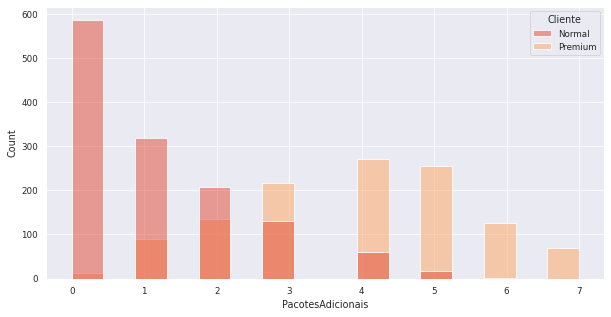

Clientes Sem nenhum pacote contratao   -	  601 
Clientes com 5 ou mais pacotes contratados  -  468
Total Cassificados -  1069


In [ ]:
data['PacotesAdicionais'] = Mapeia(data)
f, ax = plt.subplots(figsize=(10, 5))
sns.histplot(data = data, x='PacotesAdicionais', hue="Cliente")
plt.show()
print('Clientes Sem nenhum pacote contratao ', ' -\t ', (data.Pacotes<=0).value_counts()[1],
      '\nClientes com 5 ou mais pacotes contratados', ' - ', (data.Pacotes>=5).value_counts()[1] )
print('Total Cassificados - ',((data.Pacotes<=0) | (data.Pacotes>=5)).value_counts()[1])

Esse agrupamento trouxe uma nova informação muito mais legível para o nosso problema. Aqui podemos ver claramente a hipótese que levantamos antes sobre a quantidade de pacotes contratados pelos nossos clientes: quanto mais, maior a chance de ter um bom socre. 
- Para clientes sem nenhum pacote contratado, sua chance de ser categorizado como normal são quase certas;
- Enquanto para clientes com mais de 4 pacotes contratados são em sua maioria, classificados como premium.

In [ ]:
categorizados = ((data.Empresa<=13) | (data.Empresa>60) | (data.PacotesAdicionais<=0) | (data.PacotesAdicionais>=5)).value_counts()[1]
print("Categorização de Clientes com base em: \n")
print('Menos de 13 Meses como Cliente - \t',   (data.Empresa<=13).value_counts()[1])
print('Mais de 60 Meses como Cliente - \t',   (data.Empresa>60).value_counts()[1])
print('Clientes sem Pacotes Adicionais - \t', (data.PacotesAdicionais<=0).value_counts()[1])
print('Clientes com mais de 5 Pacotes Adicionais - ', (data.PacotesAdicionais>=5).value_counts()[1])
print('Total de Clientes categorizados em Normal ou Premium sem uso de Machine Learning\n',
      categorizados)
print('\nTotal de Clientes de nossa base: ', data.Cliente.count())
print('São ', categorizados*100/data.Cliente.count(),'% da nossa base categorizada' )

Categorização de Clientes com base em: 

Menos de 13 Meses como Cliente - 	 810
Mais de 60 Meses como Cliente - 	 477
Clientes sem Pacotes Adicionais - 	 601
Clientes com mais de 5 Pacotes Adicionais -  468
Total de Clientes categorizados em Normal ou Premium sem uso de Machine Learning
 1723

Total de Clientes de nossa base:  2500
São  68.92 % da nossa base categorizada


Com essa abordagem, conseguimos concluir nosso objetivo, que era classificar a maior parte dos nossos cliente sem usar Machine Learning. A partir da análise dos dados fomos capazes de categorizar 68,92% da nossa base.

#Conclusões

Através da analise dos dados foram identificados um perfil inicial dos  clientes, a maioria deles não é idoso não possui dependentes, metade possui um parceiro e o sexo estão balanceados entre homens e mulheres. Essas informações podem ser relevantes para o oferecimento de produdos ou contas com multiplos usuários (caso de serviços de streaming).

 Foi possível notar também que o serviço essencial da empresa é a prestação de serviço de internet e telefonia, mas que também são oferecidos serviços adicionais que dependem dos essenciais.

Com a análise da base de dados, foi possível chegar ao objetivo de categorização entre 'normal' e 'premium' de quase 69% dos nossos clientes sem aplicação de um único algoritimo de Machine Leaning. Isso traz muitos beneficios para empresa, entre eles:
- **Redução** de custos computacionais locais e/ou em nuvem;
- **Redução** do tempo de processamento dos dados, uma vez que não demanda um pré-processamento nem o treinamento dos algorítimos ou predições feitas por eles(como no caso do KNN que é uma etapa bem demorada);
- **Explicabilidade** do processo, onde todas as etapas podem ser constatadas e vizualmente explicadas;
- **Direcionabilidade dos resultados** para cada setor, onde o setor de vendas, por exemplo, pode se interessar por aqueles clientes que tem maiores propensões a adquirir pacotes que ainda não tenham (clientes premium tem essa tendencia), ou o setor de cobranças que podem se interessar pelas formas de pagamento dos clientes.
